# Foundations of Computer Vision | Spring 03 | Dr. Seyfipoor
# CA1
***
## Amirreza Akbari | 810899045
## 1403/02/03

# Install & Import Libraries

In [9]:
import importlib.util

required_libraries = ["cv2", "numpy", "matplotlib", "scipy"]

for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        # Install the library
        !pip install {lib}
        
from scipy.signal import convolve2d, butter, filtfilt

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


# Task 1

In [6]:
# Load the initial image
initial_image_path = "test1.png"
initial_image = cv2.imread(initial_image_path)

# Create a directory to save output images
output_folder = "output_task1"
os.makedirs(output_folder, exist_ok=True)

# Subtask 1: Save the loaded image in binary, grayscale, and RGB formats
grayscale_image = cv2.cvtColor(initial_image, cv2.COLOR_BGR2GRAY)
binary_image = cv2.threshold(grayscale_image, 128, 255, cv2.THRESH_BINARY)[1]
rgb_image = cv2.cvtColor(initial_image, cv2.COLOR_BGR2RGB)

cv2.imwrite(os.path.join(output_folder, "1_binary_image.png"), binary_image)
cv2.imwrite(os.path.join(output_folder, "1_grayscale_image.png"), grayscale_image)
cv2.imwrite(os.path.join(output_folder, "1_rgb_image.png"), rgb_image)

# Subtask 2: Increase and decrease contrast of grayscale and RGB images
# Define contrast adjustment function
def adjust_contrast(image, factor):
    median = np.median(image)
    adjusted_image = np.clip((image - median) * factor + median, 0, 255).astype(np.uint8)
    return adjusted_image

contrast_increase_factor = 1.5
contrast_decrease_factor = 0.5

grayscale_contrast_increase = adjust_contrast(grayscale_image, contrast_increase_factor)
grayscale_contrast_decrease = adjust_contrast(grayscale_image, contrast_decrease_factor)
rgb_contrast_increase = adjust_contrast(initial_image, contrast_increase_factor)
rgb_contrast_decrease = adjust_contrast(initial_image, contrast_decrease_factor)

cv2.imwrite(os.path.join(output_folder, "2_grayscale_contrast_increase.png"), grayscale_contrast_increase)
cv2.imwrite(os.path.join(output_folder, "2_grayscale_contrast_decrease.png"), grayscale_contrast_decrease)
cv2.imwrite(os.path.join(output_folder, "2_rgb_contrast_increase.png"), rgb_contrast_increase)
cv2.imwrite(os.path.join(output_folder, "2_rgb_contrast_decrease.png"), rgb_contrast_decrease)

# Subtask 3: Increase all gray values of the image by 20 units
increased_gray_image = np.clip(grayscale_image.astype(np.uint16) + 20, 0, 255).astype(np.uint8)
cv2.imwrite(os.path.join(output_folder, "3_increased_gray_image.png"), increased_gray_image)

# Subtask 4: Apply salt and pepper noise to the initial image
# Define function to add salt and pepper noise
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt_pixels = np.random.rand(*image.shape[:2]) < salt_prob
    pepper_pixels = np.random.rand(*image.shape[:2]) < pepper_prob
    noisy_image[salt_pixels] = 255
    noisy_image[pepper_pixels] = 0
    return noisy_image

salt_and_pepper_image = add_salt_pepper_noise(initial_image, salt_prob=0.05, pepper_prob=0.05)
cv2.imwrite(os.path.join(output_folder, "4_salt_and_pepper_image.png"), salt_and_pepper_image)

# Subtask 5: Decrease the noise of the image by applying median filter
median_filtered_image = cv2.medianBlur(salt_and_pepper_image, 3)
cv2.imwrite(os.path.join(output_folder, "5_median_filtered_image.png"), median_filtered_image)

# Subtask 6: Detect and extract edges using Sobel and Canny operators
sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

canny_edges = cv2.Canny(grayscale_image, 50, 200)

cv2.imwrite(os.path.join(output_folder, "6_sobel_edges.png"), sobel_edges)
cv2.imwrite(os.path.join(output_folder, "6_canny_edges.png"), canny_edges)

# Subtask 7: Sharpen the initial image
sharpened_image = cv2.detailEnhance(initial_image)
cv2.imwrite(os.path.join(output_folder, "7_sharpened_image.png"), sharpened_image)

# Subtask 8: Blur the initial image using average and Gaussian operators
average_blurred_image = cv2.blur(initial_image, (5, 5))
gaussian_blurred_image = cv2.GaussianBlur(initial_image, (5, 5), 0)

cv2.imwrite(os.path.join(output_folder, "8_average_blurred_image.png"), average_blurred_image)
cv2.imwrite(os.path.join(output_folder, "8_gaussian_blurred_image.png"), gaussian_blurred_image)


True

# Task 2

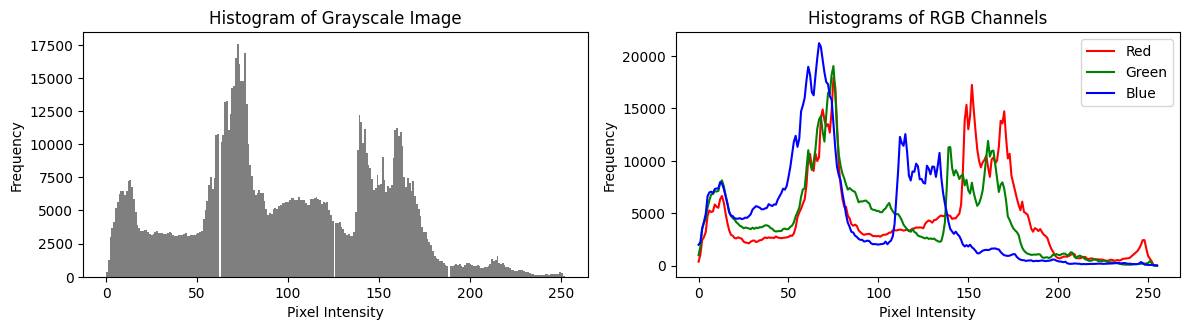

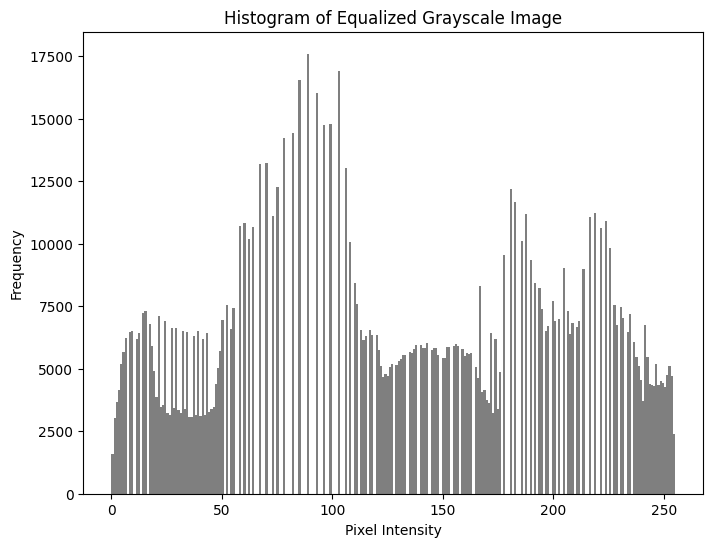

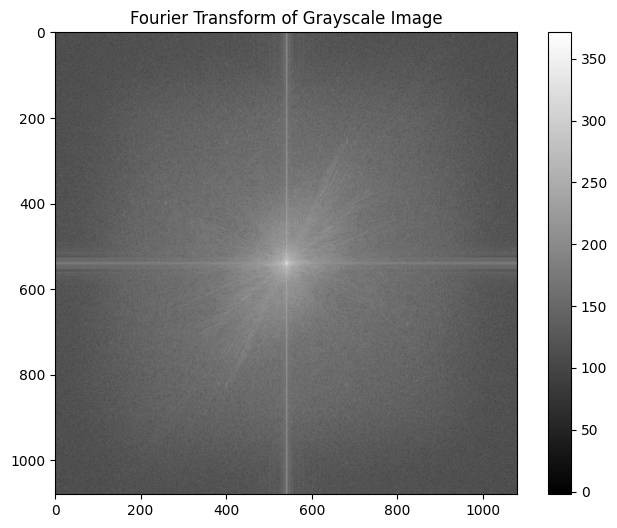

In [10]:
# Load the initial image saved from the previous task
initial_image_path = "test1.png"
initial_image = cv2.imread(initial_image_path)

# Create directories to save output images
output_folder = "output_task2"
output_folder_gray_filters = "output_task2/gray_filters"
os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_folder_gray_filters, exist_ok=True)

# Subtask 1: Decompose the image into its color components in 3 different color formats
# RGB format
rgb_image = cv2.cvtColor(initial_image, cv2.COLOR_BGR2RGB)
r_channel, g_channel, b_channel = cv2.split(rgb_image)

# HSV format
hsv_image = cv2.cvtColor(initial_image, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_image)

# YCrCb format
ycrcb_image = cv2.cvtColor(initial_image, cv2.COLOR_BGR2YCrCb)
y_channel, cr_channel, cb_channel = cv2.split(ycrcb_image)

# Save the outputs
cv2.imwrite(os.path.join(output_folder, "1_RGB.png"), rgb_image)
cv2.imwrite(os.path.join(output_folder, "1_HSV.png"), hsv_image)
cv2.imwrite(os.path.join(output_folder, "1_YCrCb.png"), ycrcb_image)
cv2.imwrite(os.path.join(output_folder, "1_RGB_r_channel.png"), r_channel)
cv2.imwrite(os.path.join(output_folder, "1_RGB_g_channel.png"), g_channel)
cv2.imwrite(os.path.join(output_folder, "1_RGB_b_channel.png"), b_channel)
cv2.imwrite(os.path.join(output_folder, "1_HSV_h_channel.png"), h_channel)
cv2.imwrite(os.path.join(output_folder, "1_HSV_s_channel.png"), s_channel)
cv2.imwrite(os.path.join(output_folder, "1_HSV_v_channel.png"), v_channel)
cv2.imwrite(os.path.join(output_folder, "1_YCrCb_y_channel.png"), y_channel)
cv2.imwrite(os.path.join(output_folder, "1_YCrCb_cr_channel.png"), cr_channel)
cv2.imwrite(os.path.join(output_folder, "1_YCrCb_cb_channel.png"), cb_channel)

# Subtask 2: Apply operations on the grayscale image and save the results
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(initial_image, cv2.COLOR_BGR2GRAY)

# Create an array containing the filter operator names
operations = ["average", "gaussian", "sobel_x", "sobel_y", "prewitt_x", "prewitt_y", "canny", "median", "max", "min"]

for operation in operations:
    if operation == "average":
        result = cv2.blur(grayscale_image, (3, 3))
    elif operation == "gaussian":
        result = cv2.GaussianBlur(grayscale_image, (3, 3), 0)
    elif operation == "sobel_x":
        result = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    elif operation == "sobel_y":
        result = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)
    elif operation == "prewitt_x":
        kernel_x = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
        result = cv2.filter2D(grayscale_image, -1, kernel_x)
    elif operation == "prewitt_y":
        kernel_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        result = cv2.filter2D(grayscale_image, -1, kernel_y)
    elif operation == "canny":
        result = cv2.Canny(grayscale_image, 100, 200)
    elif operation == "median":
        result = cv2.medianBlur(grayscale_image, 3)
    elif operation == "max":
        result = cv2.dilate(grayscale_image, np.ones((3, 3), np.uint8))
    elif operation == "min":
        result = cv2.erode(grayscale_image, np.ones((3, 3), np.uint8))

    # Save the result
    cv2.imwrite(os.path.join(output_folder_gray_filters, f"{operation}_image.png"), result)

# Define a function to apply FIR filter
def apply_fir_filter(image, kernel):
    # Reshape the 1D kernel array to a 2D kernel array
    kernel = kernel[:, np.newaxis]
    
    # Apply convolution
    filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
    return filtered_image

# Define a function to apply IIR filter
def apply_iir_filter(image, b_coeffs, a_coeffs):
    filtered_image = filtfilt(b_coeffs, a_coeffs, image)
    return filtered_image

# Define a low-pass FIR filter kernel (e.g., Gaussian kernel)
kernel_size = 5
sigma = 1
x = np.linspace(-3, 3, kernel_size)
gaussian_kernel = np.exp(-x**2 / (2 * sigma**2))
gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)  # Normalize the kernel

# Apply FIR filter
filtered_image_fir = apply_fir_filter(grayscale_image, gaussian_kernel)

# Save the FIR filtered image
cv2.imwrite(os.path.join(output_folder_gray_filters, "fir_image.png"), filtered_image_fir)

# Design an IIR filter (e.g., Butterworth low-pass filter)
order = 4
cutoff_frequency = 0.1
b, a = butter(order, cutoff_frequency, btype='low')

# Apply IIR filter
filtered_image_iir = apply_iir_filter(grayscale_image, b, a)

# Save the IIR filtered image
cv2.imwrite(os.path.join(output_folder_gray_filters, "iir_image.png"), filtered_image_iir)

# Subtask 3: Plot histograms of grayscale and RGB outputs of the initial image
# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram of grayscale image
plt.subplot(2, 2, 1)
plt.hist(grayscale_image.flatten(), bins=256, color='black', alpha=0.5)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histograms of RGB channels
plt.subplot(2, 2, 2)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    histogram = cv2.calcHist([rgb_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
plt.title('Histograms of RGB Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(['Red', 'Green', 'Blue'])

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "3_histograms.png"))
plt.show()

# Subtask 4: Equalize histogram of the grayscale output of the initial image and plot it
# Equalize histogram of the grayscale image
equalized_image = cv2.equalizeHist(grayscale_image)

# Plot histogram of equalized image
plt.figure(figsize=(8, 6))
plt.hist(equalized_image.flatten(), bins=256, color='black', alpha=0.5)
plt.title('Histogram of Equalized Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.savefig(os.path.join(output_folder, "4_equalized_histogram.png"))
plt.show()

# Save the output
cv2.imwrite(os.path.join(output_folder, "4_equalized_image.png"), equalized_image)

# Subtask 5: Plot Fourier transform of the grayscale output of the initial image
# Compute Fourier transform of the grayscale image
f_transform = np.fft.fft2(grayscale_image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

# Plot Fourier transform
plt.figure(figsize=(8, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform of Grayscale Image')
plt.colorbar()
plt.savefig(os.path.join(output_folder, "5_fourier_transform.png"))
plt.show()
